In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
from scipy import stats
import astropy.units as u
import astropy.constants as c

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

In [28]:
mass_s, inj_s, sigma_s = np.loadtxt(f"{WDIR}/outputs/limits/pbh_limits.txt", unpack=True)
mass2_s, inj2_s, sigma2_s = np.loadtxt(f"{WDIR}/outputs/limits/pbh_limits_tmp.txt", unpack=True)

In [41]:
m_s = np.geomspace(1e13, 2e18, 1000)
x = np.log10(m_s)
x0 = 14.75
est0_s = 10 ** (3.5 * x - 63)
est1_s = 10 ** (3.5 * x - 63 + 1.5 * (x-x0)**4 *(x<x0))
est_s = np.where(m_s < 10**14.25, est1_s, est0_s)

[(1e-15, 1000.0), (10000000000000.0, 2e+18)]

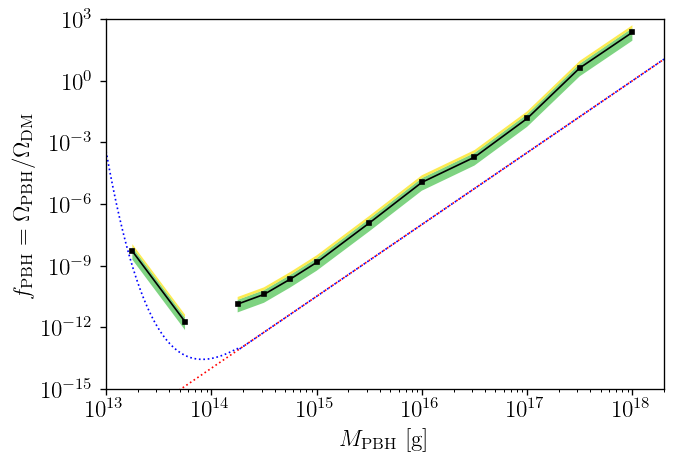

In [42]:
extras = False

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# our limits
one_sigma = inj_s * sigma_s
upper_limit = np.sqrt(stats.chi2.ppf(.9, df=1)) * one_sigma
ax.plot(mass_s, upper_limit, 'k-s', lw=1, ms=2)
ax.fill_between(mass_s, upper_limit+one_sigma, upper_limit-one_sigma, color=mpl.colormaps['viridis'](0.75), alpha=0.8, ec='none')
ax.fill_between(mass_s, upper_limit+2*one_sigma, upper_limit+one_sigma, color=mpl.colormaps['viridis'](1.0), alpha=0.8, ec='none')

# our limits
one_sigma = inj2_s * sigma2_s
upper_limit = np.sqrt(stats.chi2.ppf(.9, df=1)) * one_sigma
ax.plot(mass2_s, upper_limit, 'k-s', lw=1, ms=2)
ax.fill_between(mass2_s, upper_limit+one_sigma, upper_limit-one_sigma, color=mpl.colormaps['viridis'](0.75), alpha=0.8, ec='none')
ax.fill_between(mass2_s, upper_limit+2*one_sigma, upper_limit+one_sigma, color=mpl.colormaps['viridis'](1.0), alpha=0.8, ec='none')

ax.plot(m_s, est0_s, 'r:', lw=1)
ax.plot(m_s, est_s, 'b:', lw=1)

ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'$M_\mathrm{PBH}$ [g]', ylabel=r'$f_\mathrm{PBH}=\Omega_\mathrm{PBH}/\Omega_\mathrm{DM}$')
ax.set(ylim=(1e-15, 1e3), xlim=(1e13, 2e18))